# <center>Analyze Box Office Data with Seaborn and Python</h2>

## Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats

## Task 1: Data Loading and Exploration

In [7]:
df = pd.read_csv('train.csv')
df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

## Task 2: Visualizing the Target Distribution

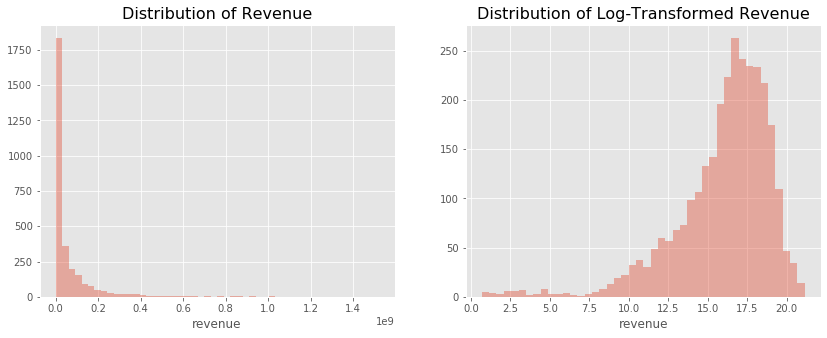

In [32]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.distplot(df['revenue'], kde = False)
plt.title('Distribution of Revenue',fontsize = 16)
plt.subplot(1,2,2)
sns.distplot(np.log1p(df['revenue']), kde = False)
plt.title('Distribution of Log-Transformed Revenue',fontsize = 16)
plt.show()

## Task 3: Relationship between Film Revenue and Budget

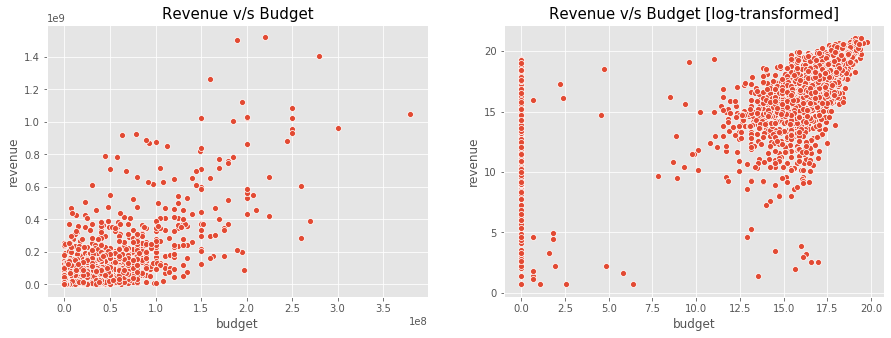

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(df['budget'],df['revenue'])
plt.title('Revenue v/s Budget',fontsize = 15)
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(df['budget']),np.log1p(df['revenue']))
plt.title('Revenue v/s Budget [log-transformed]',fontsize = 15)
plt.show()

## Task 4: Does having an Official Homepage Affect Revenue?

In [44]:
df['homepage'].value_counts().head()

http://www.transformersmovie.com/     4
http://www.lordoftherings.net/        2
http://www.thehobbit.com/             2
http://collateralbeauty-movie.com/    1
http://www.highstrungthemovie.com/    1
Name: homepage, dtype: int64

In [45]:
df['with_homepage'] = 0
df.loc[df['homepage'].isnull()== False,'with_homepage'] = 1

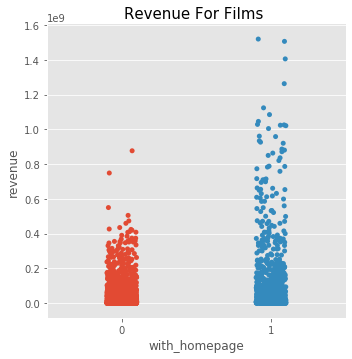

In [48]:
sns.catplot(x = 'with_homepage', y = 'revenue' ,data = df)
plt.title('Revenue For Films ',fontsize = 15)
plt.show()

## Task 5: Distribution of Languages in Film

In [54]:
lang = df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]

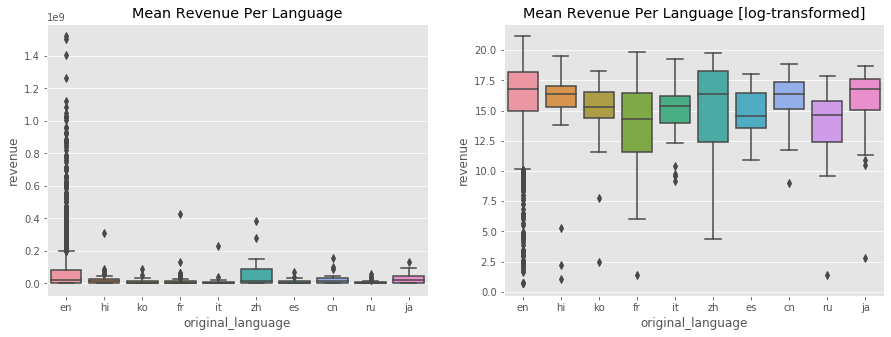

In [62]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot('original_language','revenue', data = lang)
plt.title('Mean Revenue Per Language')
plt.subplot(1,2,2)
sns.boxplot('original_language',np.log1p(df['revenue']), data = lang)
plt.title('Mean Revenue Per Language [log-transformed]')
plt.show()